## Density matrices and Krauss operators

In [113]:
from sympy import *
from sympy.physics.quantum.qubit import Qubit,matrix_to_qubit,represent,matrix_to_density
from sympy.physics.quantum import TensorProduct,Dagger

In [114]:
r=symbols('r_{x} r_{y} r_{z}',real=True)
p, theta, rho, Ɛ=symbols('p theta rho Ɛ')

The qubit density matrix is usually express in terms of the pauli matrices as 

$\rho=\frac{\mathcal{1}}{2}+ \vec{r}. \vec{\sigma}$

**Task** Define such a density matrix, and repeat the analysis from last lesson to see under which conditions it is valid, and pure

We recently took a look at the amplitud damping channel

\begin{equation}
E_{0}=\begin{pmatrix}
1 & 0 \\ 0 & \sqrt{1-\lambda}
\end{pmatrix}
\end{equation}

\begin{equation}
E_{1}=\begin{pmatrix}
0 & \sqrt{\lambda}  \\ 0&0
\end{pmatrix}
\end{equation}

**Task**:How does this map affect the qubit density matrix? use a for loop for the inner product or a vector of matrices (using symbols), and verify that $\sum_{k}^{n}E_{k}^{\dagger}E_{k}=\mathcal{I}$

In [115]:
X=Matrix([[0,1],[1,0]])
Y=Matrix([[0,-I],[I,0]])
Z=Matrix([[1,0],[0,-1]])
λ=symbols('λ', real=True)
E0=Matrix([[1,0],[0,sqrt(1-λ)]])
E1=Matrix([[0,sqrt(λ)],[0,0]])


In [116]:
(Dagger(E0)*E0+Dagger(E1)*E1).subs({conjugate(sqrt(λ)):sqrt(λ),conjugate(sqrt(1-λ)):sqrt(1-λ)}).expand()# Checking they satisfy it

Matrix([
[1, 0],
[0, 1]])

In [117]:
σ=[X,Y,Z]
var=[r[i]*σ[i] for i in range(0,len(r))]
P=(eye(2)/2)
for i in var:
    P+=i/2
P

Matrix([
[      r_{z}/2 + 1/2, r_{x}/2 - I*r_{y}/2],
[r_{x}/2 + I*r_{y}/2,       1/2 - r_{z}/2]])

In [118]:
var1=E0*P*Dagger(E0)+E1*P*Dagger(E1)
var1=var1.subs({conjugate(sqrt(λ)):sqrt(λ),conjugate(sqrt(1-λ)):sqrt(1-λ)}).expand()
var1

Matrix([
[           -r_{z}*λ/2 + r_{z}/2 + λ/2 + 1/2, r_{x}*sqrt(1 - λ)/2 - I*r_{y}*sqrt(1 - λ)/2],
[r_{x}*sqrt(1 - λ)/2 + I*r_{y}*sqrt(1 - λ)/2,             r_{z}*λ/2 - r_{z}/2 - λ/2 + 1/2]])

We can see this map as a linear transformation from $\vec{r}$ to $\vec{r'}$

$\vec{r'}=A \vec{r} + \vec{b}$


In [119]:
linear_eqs=[(var1[0,1]+var1[1,0]),I*(var1[0,1]-var1[1,0]),2*(var1[0,0]-1/2)]

In [120]:
r[2]

r_{z}

In [121]:
A,b=linear_eq_to_matrix(linear_eqs,[r[0],r[1],r[2]])

In [122]:
(A*Matrix(list(r))-b).expand()

Matrix([
[   r_{x}*sqrt(1 - λ)],
[   r_{y}*sqrt(1 - λ)],
[-r_{z}*λ + r_{z} + λ]])

In [123]:
A

Matrix([
[sqrt(1 - λ),           0,     0],
[          0, sqrt(1 - λ),     0],
[          0,           0, 1 - λ]])

In [124]:
-b

Matrix([
[0],
[0],
[λ]])

So to visualize the effect of the amplitude damping channel we just need to modify the coordinates acording to

$$r_{x}'=\sqrt{(1-\lambda)} r_{x} \\
r_{y}'=\sqrt{(1-\lambda)} r_{y} \\
r_{z}'=(1-\lambda) r_{z} + \lambda $$

When $\lambda=0$ tehn we have the same coordinates and thus no transformation we have the unit sphere

**Task** : Change the value of lambda and see how the map changes pure states, change lambda and r1 to see how it changes mixed states

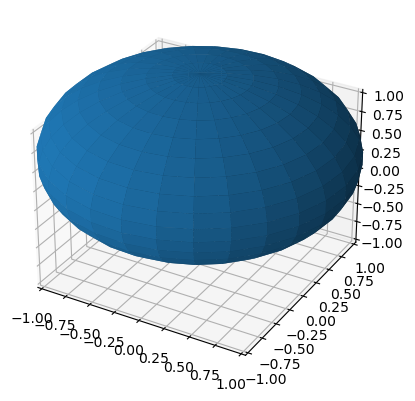

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
r1=2
u,v=np.mgrid[0:2*np.pi:30j,0:np.pi:20j]
lamda=0.5
x=r1*np.sqrt(1-lamda)*np.cos(u)*np.sin(v)
y=r1*np.sqrt(1-lamda)*np.sin(u)*np.sin(v)
z=r1*(1-lamda)*np.cos(v)+lamda
ax.plot_surface(x,y,z)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
plt.show()

# Task: Other Noise Channels


In this task used what you have learned so far to see the effects of other noise channels on a qubit, and visualize their effects on pure states, In this exercise $\sigma_{i}s$ denote the Pauli matrices


1. The bit flip channel that is given by

\begin{equation}
E_{0}= \sqrt{p} \mathcal{I}
\end{equation}

\begin{equation}
E_{1}=\sqrt{1-p} \sigma_x
\end{equation}

2. The Phase flip channel that is given by

\begin{equation}
E_{0}= \sqrt{p} \mathcal{I}
\end{equation}

\begin{equation}
E_{1}=\sqrt{1-p} \sigma_z
\end{equation}

3. The bit phase-flip channel

\begin{equation}
E_{0}= \sqrt{p} \mathcal{I}
\end{equation}

\begin{equation}
E_{1}=\sqrt{1-p} \sigma_y
\end{equation}

4. The depolarizing channel, The map has the form 

\begin{equation}
\mathcal{E} (\rho)=\frac{p\mathcal{I}}{2} + (1-p)\rho
\end{equation}

It can be represented in the operator sum representation in different ways, it can be implemented by different sum representations a convenient one is:

\begin{equation}
\mathcal{E} (\rho)=\frac{p}{3} (\sigma_{x} \rho \sigma_{x} +\sigma_{y} \rho \sigma_{y}+ \sigma_{z} \rho \sigma_{z}) + (1-p)\rho
\end{equation}

When you are done, you will have done most of what [Nielsen and Chuang's](http://mmrc.amss.cas.cn/tlb/201702/W020170224608149940643.pdf) chapter 8 covers!

1. The bit flip channel that is given by

\begin{equation}
E_{0}= \sqrt{p} \mathcal{I}
\end{equation}

\begin{equation}
E_{1}=\sqrt{1-p} \sigma_x
\end{equation}

In [126]:
E0=p*eye(2)
E0

Matrix([
[p, 0],
[0, p]])

In [127]:
E1 = sqrt(1-p)*X
E1

Matrix([
[          0, sqrt(1 - p)],
[sqrt(1 - p),           0]])

In [128]:
var2=E0*P*Dagger(E0)+E1*P*Dagger(E1)
var2=var2.subs({conjugate(sqrt(λ)):sqrt(λ),conjugate(sqrt(1-λ)):sqrt(1-λ)}).expand()
var2

Matrix([
[                p*r_{z}*conjugate(p)/2 + p*conjugate(p)/2 - r_{z}*sqrt(1 - p)*conjugate(sqrt(1 - p))/2 + sqrt(1 - p)*conjugate(sqrt(1 - p))/2, p*r_{x}*conjugate(p)/2 - I*p*r_{y}*conjugate(p)/2 + r_{x}*sqrt(1 - p)*conjugate(sqrt(1 - p))/2 + I*r_{y}*sqrt(1 - p)*conjugate(sqrt(1 - p))/2],
[p*r_{x}*conjugate(p)/2 + I*p*r_{y}*conjugate(p)/2 + r_{x}*sqrt(1 - p)*conjugate(sqrt(1 - p))/2 - I*r_{y}*sqrt(1 - p)*conjugate(sqrt(1 - p))/2,                -p*r_{z}*conjugate(p)/2 + p*conjugate(p)/2 + r_{z}*sqrt(1 - p)*conjugate(sqrt(1 - p))/2 + sqrt(1 - p)*conjugate(sqrt(1 - p))/2]])

In [129]:
linear_eqs=[(var2[0,1]+var2[1,0]),I*(var2[0,1]-var2[1,0]),2*(var2[0,0]-1/2)]
A,b=linear_eq_to_matrix(linear_eqs,[r[0],r[1],r[2]])
(A*Matrix(list(r))-b).expand()

Matrix([
[                                                            p*r_{x}*conjugate(p) + r_{x}*sqrt(1 - p)*conjugate(sqrt(1 - p))],
[                                                            p*r_{y}*conjugate(p) - r_{y}*sqrt(1 - p)*conjugate(sqrt(1 - p))],
[p*r_{z}*conjugate(p) + p*conjugate(p) - r_{z}*sqrt(1 - p)*conjugate(sqrt(1 - p)) + sqrt(1 - p)*conjugate(sqrt(1 - p)) - 1.0]])

In [130]:
A

Matrix([
[p*conjugate(p) + sqrt(1 - p)*conjugate(sqrt(1 - p)),                                                            0,                                                   0],
[                                                  0, I*(-I*p*conjugate(p) + I*sqrt(1 - p)*conjugate(sqrt(1 - p))),                                                   0],
[                                                  0,                                                            0, p*conjugate(p) - sqrt(1 - p)*conjugate(sqrt(1 - p))]])

In [131]:
-b

Matrix([
[                                                        0],
[                                                        0],
[p*conjugate(p) + sqrt(1 - p)*conjugate(sqrt(1 - p)) - 1.0]])

2. The Phase flip channel that is given by

\begin{equation}
E_{0}= \sqrt{p} \mathcal{I}
\end{equation}

\begin{equation}
E_{1}=\sqrt{1-p} \sigma_z
\end{equation}

In [132]:
E0=p*eye(2)
E0

Matrix([
[p, 0],
[0, p]])

In [133]:
E1 = sqrt(1-p)*Z
E1

Matrix([
[sqrt(1 - p),            0],
[          0, -sqrt(1 - p)]])

In [134]:
var3=E0*P*Dagger(E0)+E1*P*Dagger(E1)
var3=var3.subs({conjugate(sqrt(λ)):sqrt(λ),conjugate(sqrt(1-λ)):sqrt(1-λ)}).expand()
var3

Matrix([
[                p*r_{z}*conjugate(p)/2 + p*conjugate(p)/2 + r_{z}*sqrt(1 - p)*conjugate(sqrt(1 - p))/2 + sqrt(1 - p)*conjugate(sqrt(1 - p))/2, p*r_{x}*conjugate(p)/2 - I*p*r_{y}*conjugate(p)/2 - r_{x}*sqrt(1 - p)*conjugate(sqrt(1 - p))/2 + I*r_{y}*sqrt(1 - p)*conjugate(sqrt(1 - p))/2],
[p*r_{x}*conjugate(p)/2 + I*p*r_{y}*conjugate(p)/2 - r_{x}*sqrt(1 - p)*conjugate(sqrt(1 - p))/2 - I*r_{y}*sqrt(1 - p)*conjugate(sqrt(1 - p))/2,                -p*r_{z}*conjugate(p)/2 + p*conjugate(p)/2 - r_{z}*sqrt(1 - p)*conjugate(sqrt(1 - p))/2 + sqrt(1 - p)*conjugate(sqrt(1 - p))/2]])

In [135]:
linear_eqs=[(var3[0,1]+var3[1,0]),I*(var3[0,1]-var3[1,0]),2*(var3[0,0]-1/2)]
A,b=linear_eq_to_matrix(linear_eqs,[r[0],r[1],r[2]])
(A*Matrix(list(r))-b).expand()

Matrix([
[                                                            p*r_{x}*conjugate(p) - r_{x}*sqrt(1 - p)*conjugate(sqrt(1 - p))],
[                                                            p*r_{y}*conjugate(p) - r_{y}*sqrt(1 - p)*conjugate(sqrt(1 - p))],
[p*r_{z}*conjugate(p) + p*conjugate(p) + r_{z}*sqrt(1 - p)*conjugate(sqrt(1 - p)) + sqrt(1 - p)*conjugate(sqrt(1 - p)) - 1.0]])

In [136]:
A

Matrix([
[p*conjugate(p) - sqrt(1 - p)*conjugate(sqrt(1 - p)),                                                            0,                                                   0],
[                                                  0, I*(-I*p*conjugate(p) + I*sqrt(1 - p)*conjugate(sqrt(1 - p))),                                                   0],
[                                                  0,                                                            0, p*conjugate(p) + sqrt(1 - p)*conjugate(sqrt(1 - p))]])

In [137]:
-b

Matrix([
[                                                        0],
[                                                        0],
[p*conjugate(p) + sqrt(1 - p)*conjugate(sqrt(1 - p)) - 1.0]])

3. The bit phase-flip channel

\begin{equation}
E_{0}= \sqrt{p} \mathcal{I}
\end{equation}

\begin{equation}
E_{1}=\sqrt{1-p} \sigma_y
\end{equation}

In [176]:
E0=p*eye(2)
E0

Matrix([
[p, 0],
[0, p]])

In [177]:
E1 = sqrt(1-p)*Y
E1

Matrix([
[            0, -I*sqrt(1 - p)],
[I*sqrt(1 - p),              0]])

In [178]:
var4=E0*P*Dagger(E0)+E1*P*Dagger(E1)
var4=var4.subs({conjugate(sqrt(λ)):sqrt(λ),conjugate(sqrt(1-λ)):sqrt(1-λ)}).expand()
var4

Matrix([
[                p*r_{z}*conjugate(p)/2 + p*conjugate(p)/2 - r_{z}*sqrt(1 - p)*conjugate(sqrt(1 - p))/2 + sqrt(1 - p)*conjugate(sqrt(1 - p))/2, p*r_{x}*conjugate(p)/2 - I*p*r_{y}*conjugate(p)/2 - r_{x}*sqrt(1 - p)*conjugate(sqrt(1 - p))/2 - I*r_{y}*sqrt(1 - p)*conjugate(sqrt(1 - p))/2],
[p*r_{x}*conjugate(p)/2 + I*p*r_{y}*conjugate(p)/2 - r_{x}*sqrt(1 - p)*conjugate(sqrt(1 - p))/2 + I*r_{y}*sqrt(1 - p)*conjugate(sqrt(1 - p))/2,                -p*r_{z}*conjugate(p)/2 + p*conjugate(p)/2 + r_{z}*sqrt(1 - p)*conjugate(sqrt(1 - p))/2 + sqrt(1 - p)*conjugate(sqrt(1 - p))/2]])

In [181]:
linear_eqs=[(var4[0,1]+var4[1,0]),I*(var4[0,1]-var4[1,0]),2*(var4[0,0]-1/2)]
A,b=linear_eq_to_matrix(linear_eqs,[r[0],r[1],r[2]])
(A*Matrix(list(r))-b).expand()

Matrix([
[                                                            p*r_{x}*conjugate(p) - r_{x}*sqrt(1 - p)*conjugate(sqrt(1 - p))],
[                                                            p*r_{y}*conjugate(p) + r_{y}*sqrt(1 - p)*conjugate(sqrt(1 - p))],
[p*r_{z}*conjugate(p) + p*conjugate(p) - r_{z}*sqrt(1 - p)*conjugate(sqrt(1 - p)) + sqrt(1 - p)*conjugate(sqrt(1 - p)) - 1.0]])

In [182]:
A

Matrix([
[p*conjugate(p) - sqrt(1 - p)*conjugate(sqrt(1 - p)),                                                            0,                                                   0],
[                                                  0, I*(-I*p*conjugate(p) - I*sqrt(1 - p)*conjugate(sqrt(1 - p))),                                                   0],
[                                                  0,                                                            0, p*conjugate(p) - sqrt(1 - p)*conjugate(sqrt(1 - p))]])

In [183]:
-b

Matrix([
[                                                        0],
[                                                        0],
[p*conjugate(p) + sqrt(1 - p)*conjugate(sqrt(1 - p)) - 1.0]])

4. The depolarizing channel, The map has the form 

\begin{equation}
\mathcal{E} (\rho)=\frac{p\mathcal{I}}{2} + (1-p)\rho
\end{equation}

It can be represented in the operator sum representation in different ways, it can be implemented by different sum representations a convenient one is:

\begin{equation}
\mathcal{E} (\rho)=\frac{p}{3} (\sigma_{x} \rho \sigma_{x} +\sigma_{y} \rho \sigma_{y}+ \sigma_{z} \rho \sigma_{z}) + (1-p)\rho
\end{equation}

In [144]:
Ɛ1 = (1/2)*p*eye(2)+(1-p)*P
Ɛ1

Matrix([
[0.5*p + (1 - p)*(r_{z}/2 + 1/2),   (1 - p)*(r_{x}/2 - I*r_{y}/2)],
[  (1 - p)*(r_{x}/2 + I*r_{y}/2), 0.5*p + (1/2 - r_{z}/2)*(1 - p)]])

In [145]:
simplify(Ɛ1)

Matrix([
[  -p*r_{z}/2 + r_{z}/2 + 1/2, -(p - 1)*(r_{x} - I*r_{y})/2],
[-(p - 1)*(r_{x} + I*r_{y})/2,    p*r_{z}/2 - r_{z}/2 + 1/2]])

In [146]:
Ɛ2 = (p/3)*(X*P*X+Y*P*Y+Z*P*Z)+(1-p)*P
Ɛ2

Matrix([
[             p*(3/2 - r_{z}/2)/3 + (1 - p)*(r_{z}/2 + 1/2), p*(-r_{x}/2 + I*r_{y}/2)/3 + (1 - p)*(r_{x}/2 - I*r_{y}/2)],
[p*(-r_{x}/2 - I*r_{y}/2)/3 + (1 - p)*(r_{x}/2 + I*r_{y}/2),              p*(r_{z}/2 + 3/2)/3 + (1/2 - r_{z}/2)*(1 - p)]])

In [147]:
simplify(Ɛ2)

Matrix([
[ -2*p*r_{z}/3 + r_{z}/2 + 1/2, (3 - 4*p)*(r_{x} - I*r_{y})/6],
[(3 - 4*p)*(r_{x} + I*r_{y})/6,   2*p*r_{z}/3 - r_{z}/2 + 1/2]])

In [164]:
var5=Ɛ1
var5=var5.subs({conjugate(sqrt(λ)):sqrt(λ),conjugate(sqrt(1-λ)):sqrt(1-λ)}).expand()
var5

Matrix([
[                    -p*r_{z}/2 + r_{z}/2 + 1/2, -p*r_{x}/2 + I*p*r_{y}/2 + r_{x}/2 - I*r_{y}/2],
[-p*r_{x}/2 - I*p*r_{y}/2 + r_{x}/2 + I*r_{y}/2,                      p*r_{z}/2 - r_{z}/2 + 1/2]])

In [165]:
linear_eqs=[(var5[0,1]+var5[1,0]),I*(var5[0,1]-var5[1,0]),2*(var5[0,0]-1/2)]
linear_eqs

[-p*r_{x} + r_{x}, I*(I*p*r_{y} - I*r_{y}), -p*r_{z} + r_{z}]

In [166]:
A,b=linear_eq_to_matrix(linear_eqs,[r[0],r[1],r[2]])

In [167]:
(A*Matrix(list(r))-b).expand()

Matrix([
[-p*r_{x} + r_{x}],
[-p*r_{y} + r_{y}],
[-p*r_{z} + r_{z}]])

In [168]:
A

Matrix([
[1 - p,           0,     0],
[    0, I*(I*p - I),     0],
[    0,           0, 1 - p]])

In [169]:
-b

Matrix([
[0],
[0],
[0]])

In [170]:
var6=Ɛ2
var6=var6.subs({conjugate(sqrt(λ)):sqrt(λ),conjugate(sqrt(1-λ)):sqrt(1-λ)}).expand()
var6

Matrix([
[                      -2*p*r_{z}/3 + r_{z}/2 + 1/2, -2*p*r_{x}/3 + 2*I*p*r_{y}/3 + r_{x}/2 - I*r_{y}/2],
[-2*p*r_{x}/3 - 2*I*p*r_{y}/3 + r_{x}/2 + I*r_{y}/2,                        2*p*r_{z}/3 - r_{z}/2 + 1/2]])

In [171]:
linear_eqs=[(var6[0,1]+var6[1,0]),I*(var6[0,1]-var6[1,0]),2*(var6[0,0]-1/2)]
linear_eqs

[-4*p*r_{x}/3 + r_{x}, I*(4*I*p*r_{y}/3 - I*r_{y}), -4*p*r_{z}/3 + r_{z}]

In [172]:
A,b=linear_eq_to_matrix(linear_eqs,[r[0],r[1],r[2]])

In [173]:
(A*Matrix(list(r))-b).expand()

Matrix([
[-4*p*r_{x}/3 + r_{x}],
[-4*p*r_{y}/3 + r_{y}],
[-4*p*r_{z}/3 + r_{z}]])

In [174]:
A

Matrix([
[1 - 4*p/3,               0,         0],
[        0, I*(4*I*p/3 - I),         0],
[        0,               0, 1 - 4*p/3]])

In [175]:
-b

Matrix([
[0],
[0],
[0]])